In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [119]:
size = 100,100

In [116]:
img11 = cv2.imread('Lab3_images/Lab3_images/imgQ12-1.png')
img1 = cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)


In [120]:
img.thumbnail(size)

AttributeError: 'numpy.ndarray' object has no attribute 'thumbnail'

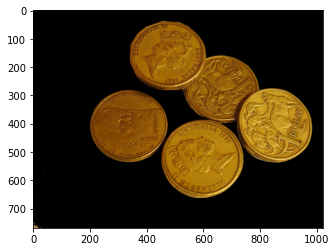

In [117]:
plt.imshow(img1)
#plt.title(k)
plt.show()

In [37]:
img1 = cv2.resize(img1,(100,100))

In [38]:
img = np.reshape(img1,[-1,3])

In [40]:
img.shape

(10000, 3)

In [16]:
ms = MeanShift(bin_seeding=True)

In [17]:
ms.fit(img1)
labels = ms.labels_
labels.shape

(10000,)

In [9]:
centers = ms.cluster_centers_
centers.shape

(4, 3)

In [52]:
center = np.uint8(centers)
center
res = center[labels.flatten()]
res.shape
res2 = res.reshape((img1.shape))
res2 = cv2.resize(res2,(img11.shape[1],img11.shape[0]))
res2.shape

(768, 1024, 3)

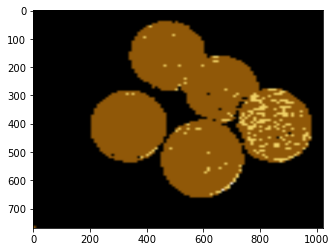

In [53]:
plt.imshow(res2)
#plt.title(k)
plt.show()

In [4]:
img21 = cv2.imread('Lab3_images/Lab3_images/imgQ12-1.png')
img22 = cv2.imread('Lab3_images/Lab3_images/imgQ12-2.png')

In [17]:
gray2 = cv2.cvtColor(img21, cv2.COLOR_BGR2GRAY)
ret2, thresh2 = cv2.threshold(gray2, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

kernel2 = np.ones((3, 3), dtype=np.uint8)
# 2.噪声去除
open2 = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel2, iterations=2)
# 3.确定背景区域
sure_bg2 = cv2.dilate(open2, kernel2, iterations=3)
# 4.寻找前景区域
dist_transform2 = cv2.distanceTransform(open2, 1, 5)
ret2, sure_fg2 = cv2.threshold(dist_transform2, 0.5 * dist_transform2.max(), 255, cv2.THRESH_BINARY)
# 5.找到未知区域
sure_fg2 = np.uint8(sure_fg2)
unknow2 = cv2.subtract(sure_bg2, sure_fg2)

# 6.类别标记
ret2, markers2 = cv2.connectedComponents(sure_fg2)

In [24]:
ret2, markers2 = cv2.connectedComponents(sure_fg2)
# 为所有的标记加1，保证背景是0而不是1
markers2 = markers2 + 1
# 现在让所有的未知区域为0
markers2[unknow2 == 255] = 0

# 7.分水岭算法
markers2 = cv2.watershed(gray2, markers2)
gray2[markers2 == -1] = (0, 0, 255)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'cv::watershed'


In [22]:
labels2 = watershed(-dist_transform2, markers2, mask=gray2)

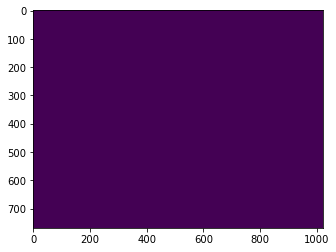

In [23]:
plt.imshow(labels2)

In [5]:
gray1 = cv2.cvtColor(img21,cv2.COLOR_BGR2GRAY)
cv2.threshold(gray1,127,0,cv2.THRESH_BINARY_INV)

(127.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [6]:
distance = ndi.distance_transform_edt(gray1)
distance

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 9.89949494,  9.21954446,  8.60232527, ...,  0.        ,
         0.        ,  0.        ],
       [10.63014581, 10.        ,  9.43398113, ...,  0.        ,
         0.        ,  0.        ],
       [11.40175425, 10.81665383, 10.29563014, ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
distance.shape, gray1.shape

((768, 1024), (768, 1024))

In [8]:
local_maxi = peak_local_max(distance, indices = False, footprint=np.ones((3,3)),labels = gray1)

In [9]:
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=gray1)

Text(0.5, 1.0, 'Separated objects')

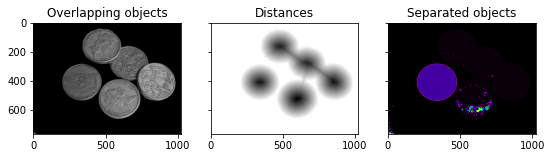

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gray1, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

In [10]:
cv2.imshow('image',labels)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [112]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)

In [125]:
cv2.imshow('image',img21)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [113]:
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

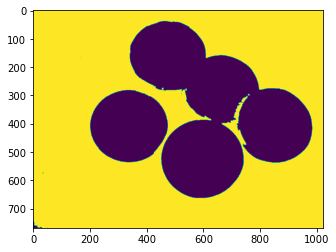

In [82]:
plt.imshow(opening)

In [115]:
dist_transform = cv2.distanceTransform(opening,1,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(),255, cv2.THRESH_BINARY)


In [116]:
sure_fg = np.uint8(sure_fg)

In [117]:
unknow = cv2.subtract(sure_bg,sure_fg)

In [118]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknow == 255] = 0

In [123]:
markers = cv2.watershed(img, markers)
img21[markers == -1] = (0, 0, 255)

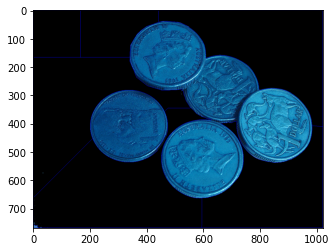

In [124]:
plt.imshow(img21)

In [17]:
img4 = cv2.imread('Lab3_images/Lab3_images/imgQ41.jpg')


In [18]:
img41 = cv2.resize(img4,(100,100))

In [19]:
img411 = np.reshape(img41,[-1,3])

In [20]:
img411.shape

(10000, 3)

In [21]:
ms = MeanShift(bin_seeding=True)
ms.fit(img411)
labels = ms.labels_
centers = ms.cluster_centers_

In [114]:
ms_label = ms.fit_predict(img41)

KeyboardInterrupt: 

In [97]:
ms_label = np.reshape(ms_label,img4.shape)
ms_label = cv2.resize(ms_label,(img4.shape[0],img4.shape[1]))

ValueError: cannot reshape array of size 463203 into shape (100,100)

In [24]:
center = np.uint8(centers)
center
res = center[labels.flatten()]
res2 = res.reshape((img41.shape))
res2 = cv2.resize(res2,(img4.shape[1],img4.shape[0]))
res2.shape

(321, 481, 3)

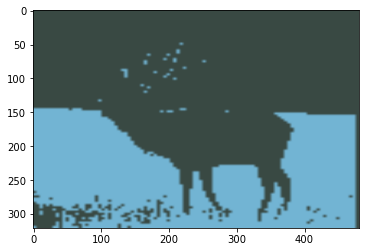

In [25]:
plt.imshow(res2)

In [70]:
img42 = cv2.imread('Lab3_images/Lab3_images/imgQ42.jpg')
img42 = cv2.cvtColor(img42,cv2.COLOR_BGR2RGB)
img421 = cv2.resize(img42,(100,100))
img422 = np.reshape(img421,[-1,3])
ms42 = MeanShift(bin_seeding=True)
ms42.fit(img422)
labels42 = ms42.labels_
centers42 = ms42.cluster_centers_
center42 = np.uint8(centers42)
res42 = center42[labels42.flatten()]
res42 = res42.reshape((img421.shape))
res42 = cv2.resize(res42,(img42.shape[1],img42.shape[0]))


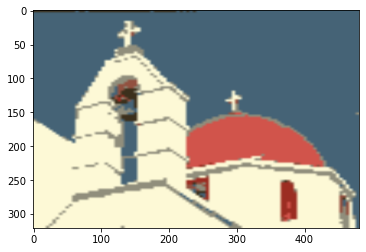

In [71]:
plt.imshow(res42)
plt.show()